In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = 'https://drive.google.com/drive/my-drive'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model

In [ ]:
test_directory = '/content/drive/MyDrive/playerdata/dataset/test'
train_directory = '/content/drive/MyDrive/playerdata/dataset/train'

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
resnet_model.trainable = True   # True
set_trainable = False

for layer in resnet_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = Sequential()

model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=test_directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224)
)


Found 209 files belonging to 2 classes.
Found 72 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 113s 13s/step - loss: 19.4622 - accuracy: 0.4641 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 73s 11s/step - loss: 0.7005 - accuracy: 0.4641 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 67s 10s/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 73s 11s/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5278
Epoch 5/10
7/7 [==============================] - 72s 11s/step - loss: 0.6959 - accuracy: 0.5311 - val_loss: 0.6928 - val_accuracy: 0.5278
Epoch 6/10
7/7 [==============================] - 82s 13s/step - loss: 0.6932 - accuracy: 0.4785 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 68s 10s/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
7/7 [=========

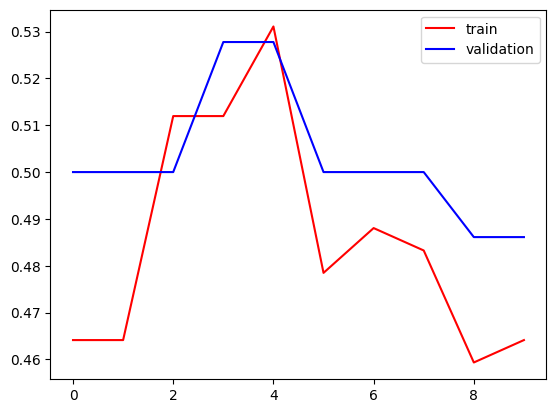

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

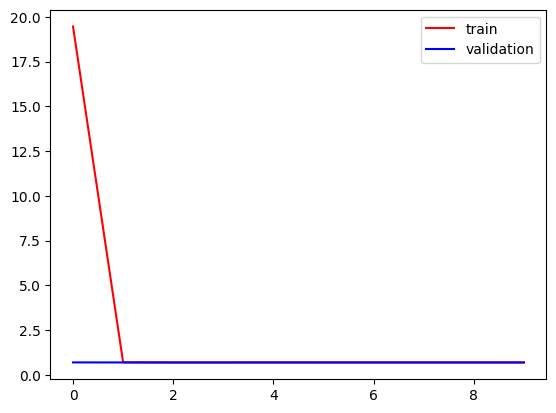

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread(r'/content/drive/MyDrive/playerdata/dataset/test/dhoni/d18.jpg')

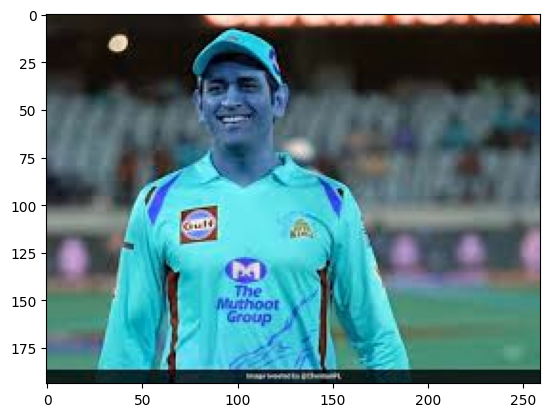

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(194, 259, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 206ms/step


In [ ]:
result

array([[0.79305416]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    prediction="dhoni"
else:
    prediction="kohli"
print(prediction)

dhoni


In [ ]:
test_img = cv2.imread(r'/content/drive/MyDrive/playerdata/dataset/test/kohli/kohli_0_3155.jpeg')

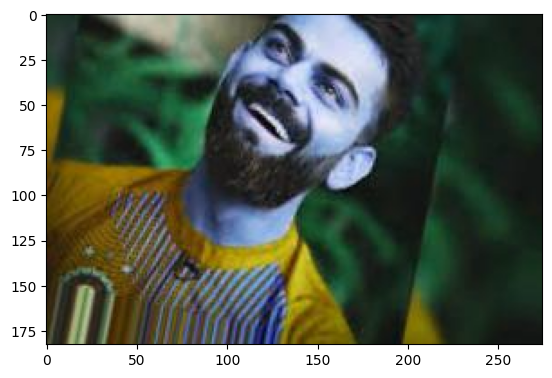

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 218ms/step


In [ ]:
result

array([[0.58544886]], dtype=float32)

In [ ]:
if result[0][0]>=0.5:
    prediction="kohli"
else:
    prediction="dhoni"
print(prediction)

kohli
